In [2]:
import os
import random

import albumentations as A
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from albumentations.pytorch import ToTensorV2
from PIL import Image

In [3]:
# change current working directory to project root
os.chdir("/home/maheshda/glaucoma_classification")

In [4]:

from src.dataset import Refuge1Dataset

In [5]:
IMG_H, IMG_W = 512, 512

In [6]:
train_transform = A.Compose(
    [
        A.CenterCrop(1200, 1080),
        A.Resize(IMG_H, IMG_W),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.Normalize(
            mean=[0.0, 0.0, 0.0],
            std=[1.0, 1.0, 1.0],
            max_pixel_value=255.0
        ),
        ToTensorV2(),
    ],
    additional_targets={
        'mask1': 'image',
        'mask2': 'image'
    }
)
val_transform = A.Compose(
    [
        A.CenterCrop(1200, 1080),
        A.Resize(IMG_H, IMG_W),
        A.Normalize(
            mean=[0.0, 0.0, 0.0],
            std=[1.0, 1.0, 1.0],
            max_pixel_value=255.0
        ),
        ToTensorV2()
    ],
    additional_targets={
        'mask1': 'image',
        'mask2': 'image'
    }
)

In [7]:
from src.dataset import Refuge1Dataset

train_ds = Refuge1Dataset(split='train', transform=None, need_mask=True)


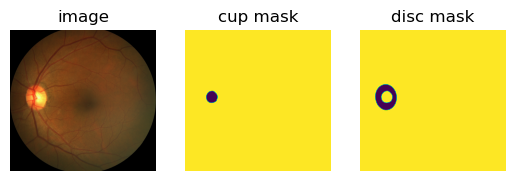

In [8]:


# plot image and mask

plt.subplot(1,3,1)
plt.imshow(train_ds[0][0])
plt.title('image')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(train_ds[0][1])
plt.title('cup mask')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(train_ds[0][2])
plt.title('disc mask')
plt.axis('off')
plt.show()


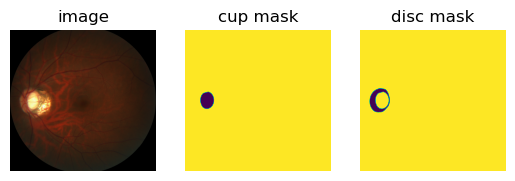

(224, 909, 420, 1155)
(141, 859, 431, 1204)


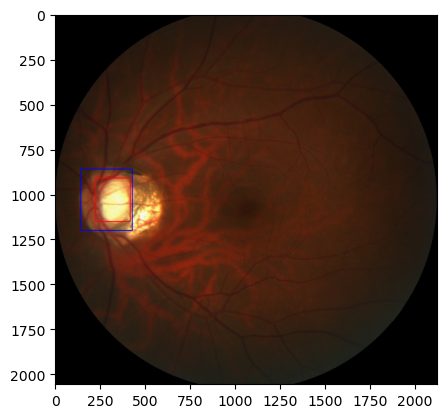

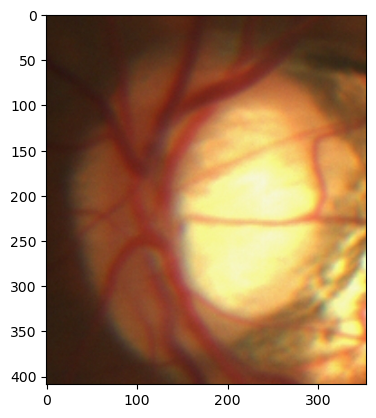

In [16]:
# get random image
rand_img = random.choice(train_ds)

img = Image.fromarray(rand_img[0])
cup_mask = Image.fromarray(rand_img[1])
disc_mask = Image.fromarray(rand_img[2])

# plot image and mask
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('image')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(cup_mask)
plt.title('cup mask')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(disc_mask)
plt.title('disc mask')
plt.axis('off')
plt.show()


cup_mask = Image.eval(cup_mask, lambda x: 1-x)
disc_mask = Image.eval(disc_mask, lambda x: 1-x)

cup_bbox = cup_mask.getbbox()
disc_bbox = disc_mask.getbbox()

print(cup_bbox)
print(disc_bbox)

# draw bounding box on image
from PIL import ImageDraw
img_draw = img.copy()
draw = ImageDraw.Draw(img_draw)
draw.rectangle(cup_bbox, outline='red', width=5)
draw.rectangle(disc_bbox, outline='blue', width=5)

plt.imshow(img_draw)
plt.show()


# crop image 
padding = 32
disc_bbox = (disc_bbox[0]-padding, disc_bbox[1]-padding, disc_bbox[2]+padding, disc_bbox[3]+padding)
img_crop = img.crop(disc_bbox)
plt.imshow(img_crop)


In [17]:
img_crop = img_crop.convert('HSV')

img_crop_arr = np.array(img_crop)
# # increase saturation
plt.subplot(1,3,1)
plt.imshow(img_crop_arr[0])
plt.title('Hue')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(img_crop_arr[1])
plt.title('Saturation')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(img_crop_arr[2])
plt.title('Value')
plt.axis('off')
plt.show()

(409, 354, 3)